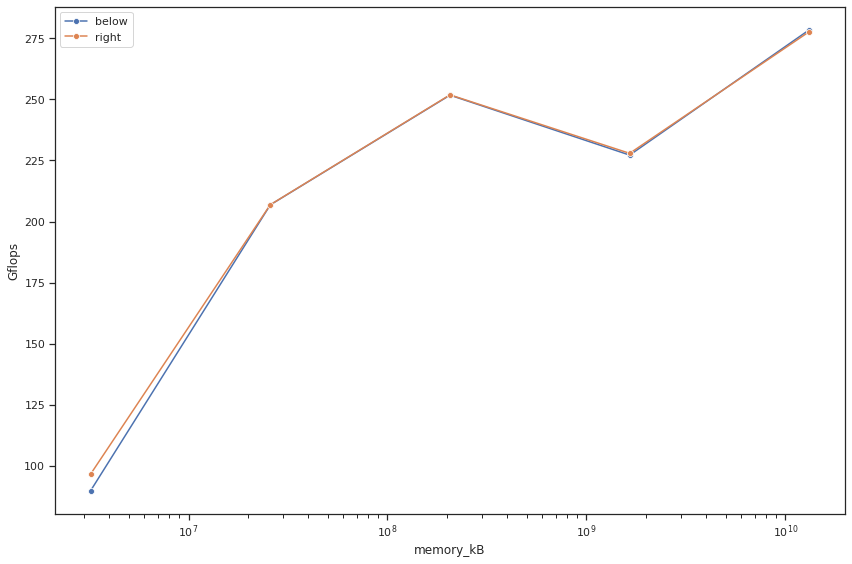

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", context="notebook")

FIGURE_FOLDER = "figures/"
VERSION = "5"
DATA_FOLDER = "matmult_v" + VERSION + "/"

def load_data(filename):
    iterations = 10000
    double_size = 8
    data = pd.read_csv(filename ,delim_whitespace=True, header=None, names=["N", "memory_kb", "Mflops"])
    data["memory_B"] = 3*data["N"]**3*double_size
    data["memory_kB"] = data["memory_B"]*1e-3
    data["memory_MB"] = data["memory_B"]*1e-6
    data["memory_GB"] = data["memory_B"]*1e-9
    # data["iter_per_sec"] = iterations / data["wall"]
    data["flops"] = data["Mflops"] / 1e-6
    data["iter_per_sec"] = data["flops"]/(12*data["N"]**3)
    data["Gflops"] = data["flops"]*1e-9
    data["Effective bandwidth"] = data["N"]**3 * double_size * 4 * data["iter_per_sec"] * 1e-3
    # data["flops"] = 6*iterations*data["N"]**2/data["wall"]  # 6 flop to update each point
    # data["Mflops"] = data["flops"]*1e-6
    data["Gflops"] = data["Mflops"]*1e-3
    # data["speedup"] = [data.query(f"threads == 1 and N == {row.N}")["wall"].item()/row["wall"] for i, row in data.iterrows()]
    return data

def plot_part6():
    data = load_data(DATA_FOLDER + "results_gpu" + VERSION + ".txt")
    # data_below = load_data(DATA_FOLDER + "results_gpu" + VERSION + "_below.txt")
    # data_right = load_data(DATA_FOLDER + "results_gpu" + VERSION + "_right.txt")
    # data_seq_gpu["type"] = "GPU (sequential)"
    # data_1gpu = load_data("poisson_v2/" + DATA_FOLDER + "1gpu.txt")
    # data_1gpu["type"] = "1 GPU"
    # data_cpu = load_data("cpu/" + DATA_FOLDER + "cpu.txt")
    # data_cpu["type"] = "CPU"
    # data_1gpu["speedup"] = data_cpu["wall"] / data_1gpu["wall"]
    # data_seq_gpu["speedup"] = data_cpu["wall"] / data_seq_gpu["wall"]
    # data_cpu["speedup"] = 1

    # data = pd.concat((data_cpu, data_seq_gpu, data_1gpu), ignore_index=True)

    fig, ax = plt.subplots(figsize=(12, 8), ncols=1, nrows=1)

    # ax = axs[0,0]
    ax = sns.lineplot(data=data, x="memory_kB", y="Gflops", marker="o", ax=ax)
    # ax = sns.lineplot(data=data_below, x="memory_kB", y="Gflops", marker="o", ax=ax, legend="brief", label="below")
    # ax = sns.lineplot(data=data_right, x="memory_kB", y="Gflops", marker="o", ax=ax, legend="brief", label="right")
    ax.set_xscale("log", base=10)
    # ax.set_yscale("log", base=10)

    # ax = axs[0,1]
    # ax = sns.lineplot(data=data, x="memory_kB", y="iter_per_sec", hue="type", marker="o", ax=ax)
    # ax.set_xscale("log", base=10)
    # ax.set_yscale("log", base=10)

    # ax = axs[1,0]
    # ax = sns.lineplot(data=data, x="memory_kB", y="speedup", hue="type", marker="o", ax=ax)
    # ax.set_xscale("log", base=10)

    # ax = axs[1,1]
    # ax = sns.lineplot(data=data, x="memory_kB", y="wall", hue="type", marker="o", ax=ax)
    # ax.set_xscale("log", base=10)

    fig.tight_layout()
    plt.show()
    fig.savefig(FIGURE_FOLDER + "results_gpu" + VERSION + "_below.png", dpi=500)

if __name__ == "__main__":
    plot_part6()
    